In [13]:
from scipy.stats import qmc
import numpy as np

import csv
import xarray as xr
import rioxarray as rx
import pandas as pd
import os
import netCDF4 as nc4
import sys
import shutil
from tempfile import TemporaryFile                                                                                                                                 
import argparse                                                                                                                                                                                                                                                                                                       
import tempfile 
import random
import re

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

from cartopy.io.shapereader import Reader
import shapefile
from shapely.geometry import shape, Point, LinearRing

import regionmask

from shapely.geometry import MultiPolygon, Polygon

In [2]:
fates = '/pscratch/sd/j/jneedham/elm_runs/fbnc_cal/apr24/fbnc_f45_v3_rdark_vert_1.E5e483733fa-F77ac7623.2024-04-24/run/fbnc_f45_v3_rdark_vert_1.E5e483733fa-F77ac7623.2024-04-24.2190s.nc'
fates = xr.open_dataset(fates, decode_times=False)

In [3]:
cropped_fates = fates.isel(lat=slice(15,31))

In [4]:
# extract lat and lon coords
fates_lon = cropped_fates.coords['lon']
fates_lat = cropped_fates.coords['lat']

In [5]:
domain = '/global/homes/j/jneedham/tropical-fixed-biog/domainsurf/domain.lnd.fv4x5_gx3v7.091218.nc'
domain = xr.open_dataset(domain, decode_times=False)

In [6]:

cropped_domain = domain.sel(nj=slice(15,31))

In [7]:
# save the new file 
cropped_domain.to_netcdf('/global/homes/j/jneedham/tropical-fixed-biog/domainsurf/tropical_domain.nc')

In [8]:
cropped_domain = cropped_domain.rename({'nj': 'lat', 'ni':'lon'})

In [9]:
area = cropped_domain.area

In [10]:
area = area.assign_coords({'lon':fates_lon})
area = area.assign_coords({'lat':fates_lat})


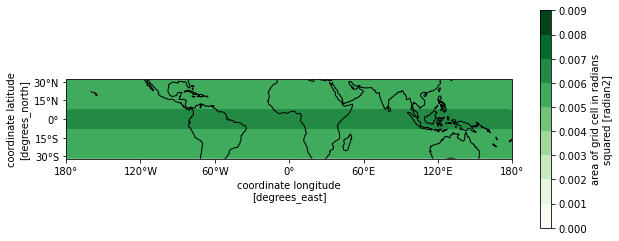

In [16]:
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(10,4))

clevs=np.arange(0,0.01,0.001)
cs = area.plot(levels=clevs,cmap='Greens', ax=axs, label='Area')
axs.coastlines()

# Define the xticks for longitude
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
axs.set_yticks(np.arange(-30,31,15), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)


### Surface data file

In [12]:
surf = '/global/homes/j/jneedham/tropical-fixed-biog/domainsurf/surfdata_4x5_simyr2000_c130927.nc'
surf = xr.open_dataset(surf, decode_times=False)

In [13]:
surf

<xarray.Dataset>
Dimensions:               (lsmlat: 46, lsmlon: 72, nlevsoi: 10, natpft: 17, time: 12, lsmpft: 17, numurbl: 3, numrad: 2, nlevurb: 5, nglcecp1: 11, nglcec: 10)
Coordinates:
  * natpft                (natpft) int32 0 1 2 3 4 5 6 ... 10 11 12 13 14 15 16
  * time                  (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: lsmlat, lsmlon, nlevsoi, lsmpft, numurbl, numrad, nlevurb, nglcecp1, nglcec
Data variables: (12/78)
    mxsoil_color          int32 ...
    SOIL_COLOR            (lsmlat, lsmlon) int32 ...
    PCT_SAND              (nlevsoi, lsmlat, lsmlon) float64 ...
    PCT_CLAY              (nlevsoi, lsmlat, lsmlon) float64 ...
    ORGANIC               (nlevsoi, lsmlat, lsmlon) float64 ...
    FMAX                  (lsmlat, lsmlon) float64 ...
    ...                    ...
    PCT_GLC_GIC           (lsmlat, lsmlon) float64 ...
    PCT_GLC_ICESHEET      (lsmlat, lsmlon) float64 ...
    TOPO_GLC_MEC          (nglcec, lsmlat, lsmlon) float64 ...
    TOPO                  (lsmlat, lsmlon) float64 ...
    PCT_URBAN             (numurbl, lsmlat, lsmlon) float64 ...
    URBAN_REGION_ID       (lsmlat, lsmlon) int32 ...
Attributes: (12/51)
    Conventions:                          NCAR-CSM
    History_Log:                          created on: 09-27-13 14:03:10
    Logname:                              sacks
    Host:                                 yslogin6
    Source:                               Community Land Model: CLM4
    Version:                              $HeadURL: https://svn-ccsm-models.c...
    ...                                   ...
    map_ch4_params_file:                  map_360x720_cruncep_to_4x5_nomask_a...
    Soil_texture_raw_data_file_name:      mksrf_soitex.10level.c010119.nc
    Soil_color_raw_data_file_name:        mksrf_soilcol_global_c090324.nc
    Fmax_raw_data_file_name:              mksrf_fmax_3x3min_USGS_c120911.nc
    Organic_matter_raw_data_file_name:    mksrf_organic_10level_5x5min_ISRIC-...
    Vegetation_type_raw_data_filename:    mksrf_landuse_rc2000_c090630.nc

In [14]:
cropped_surf = surf.sel(lsmlat=slice(15,31))

In [15]:
# save the new file 
cropped_surf.to_netcdf('/global/homes/j/jneedham/tropical-fixed-biog/domainsurf/tropical_surf.nc')

### DATM file

In [7]:
datm_domain = '/global/homes/j/jneedham/tropical-fixed-biog/domainsurf/domain.lnd.360x720_gswp3.0v1.c170606.nc'
datm_domain = xr.open_dataset(datm_domain, decode_times=False)

In [8]:
print(datm_domain)

<xarray.Dataset>
Dimensions:  (nj: 360, ni: 720, nv: 4)
Dimensions without coordinates: nj, ni, nv
Data variables:
    xc       (nj, ni) float64 ...
    yc       (nj, ni) float64 ...
    xv       (nv, nj, ni) float64 ...
    yv       (nv, nj, ni) float64 ...
    mask     (nj, ni) int32 ...
    area     (nj, ni) float64 ...
Attributes:
    case_title:  GSWP3 3-Hourly Atmospheric Forcing


In [9]:
cropped_datm_domain = datm_domain.sel(nj=slice(90,270))

In [10]:
cropped_datm_domain

<xarray.Dataset>
Dimensions:  (nj: 180, ni: 720, nv: 4)
Dimensions without coordinates: nj, ni, nv
Data variables:
    xc       (nj, ni) float64 ...
    yc       (nj, ni) float64 ...
    xv       (nv, nj, ni) float64 ...
    yv       (nv, nj, ni) float64 ...
    mask     (nj, ni) int32 ...
    area     (nj, ni) float64 ...
Attributes:
    case_title:  GSWP3 3-Hourly Atmospheric Forcing

In [11]:
# save the new file 
cropped_datm_domain.to_netcdf('/global/homes/j/jneedham/tropical-fixed-biog/domainsurf/tropical_datm_domain.nc')